In [2]:
# Import Packages
import pandas as pd
import numpy as np

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Algorithms
import xgboost as xgb
import sklearn.tree as tree
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
# Import The Data from: (https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)
df = pd.read_csv("fetal_health.csv")

### Basic Info about the Data

In [8]:
# Number of Rows
len(df)

2126

In [4]:
# First Look at the Data
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Number of Non-null rows equals row count for all columns. So we are dealing with a Dataset with no missing Data.

In [13]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

All the columns vary so, each may be of use for prediction.

### Information about the dependent variable

In [28]:
var_count = df.groupby(df["fetal_health"])["fetal_health"].count()
# Count of each category
var_count

fetal_health
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

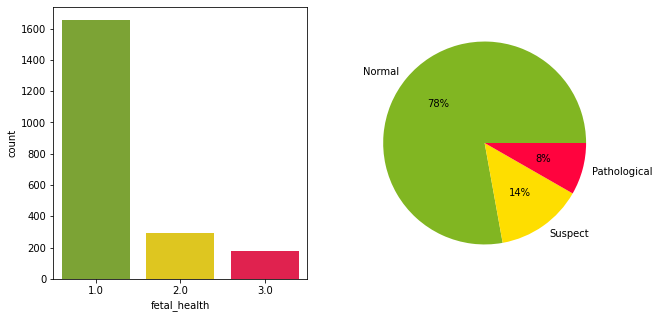

In [59]:
# Color Palette
colors2 = ["#81b622", "#fede00", "#ff033e"]
plt.figure(figsize=(10, 5))

# Barplot
plt.subplot(121)
sns.countplot(x="fetal_health", data=df, palette=colors2)

# Pie chart
plt.subplot(122)
plt.pie(var_count, labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%", colors=colors2)

plt.show()

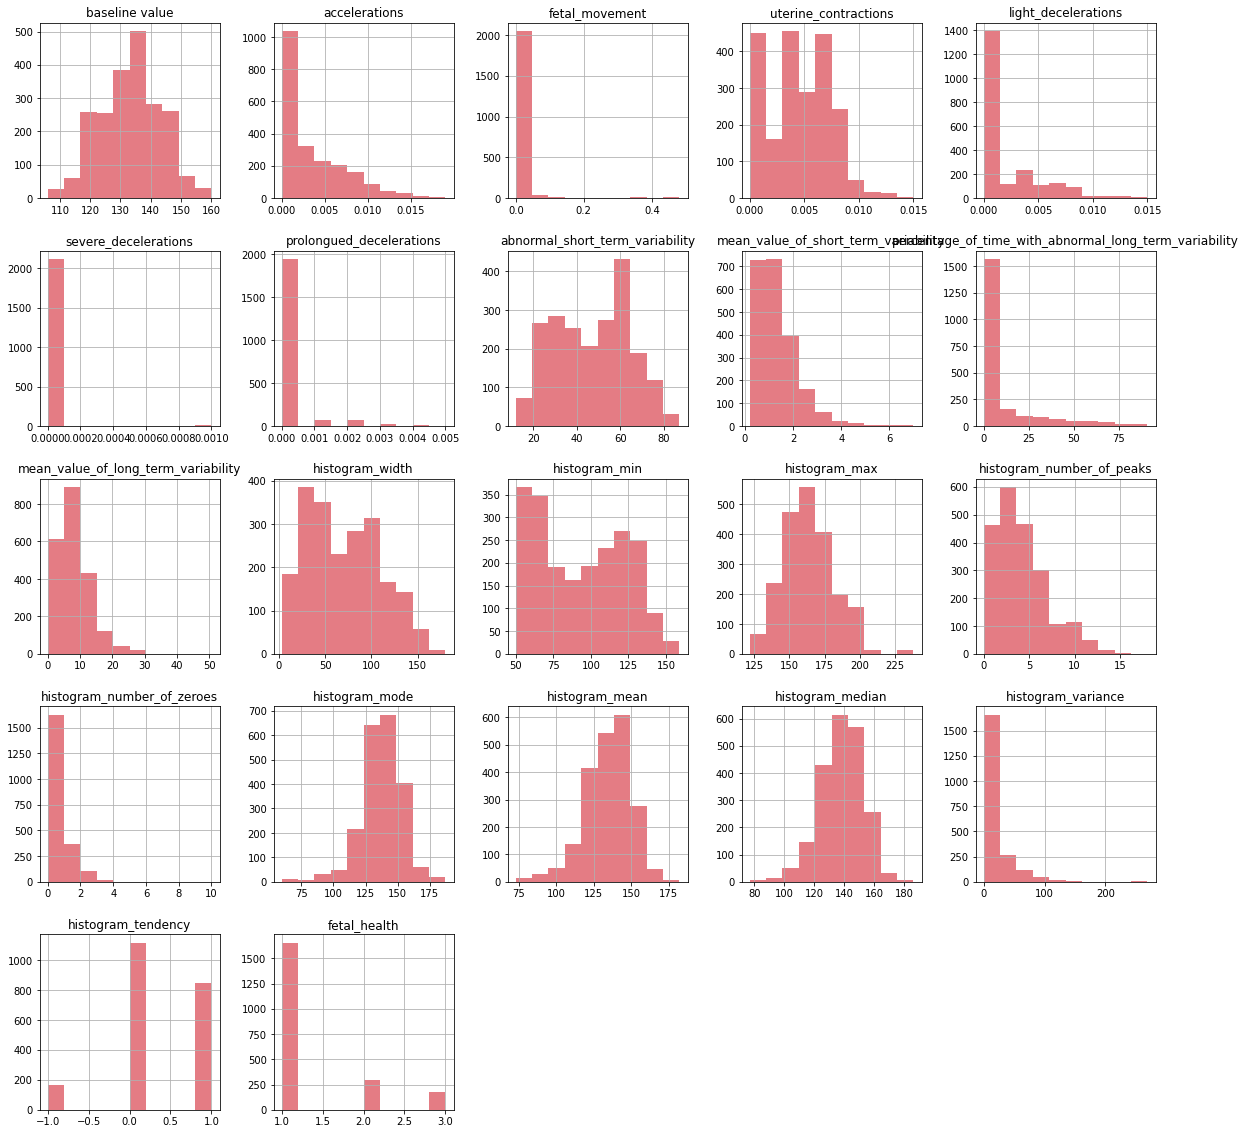

In [61]:
# Histograms of each variable
data_hist_plot = df.hist(figsize = (20,20), color = "#e47c84")

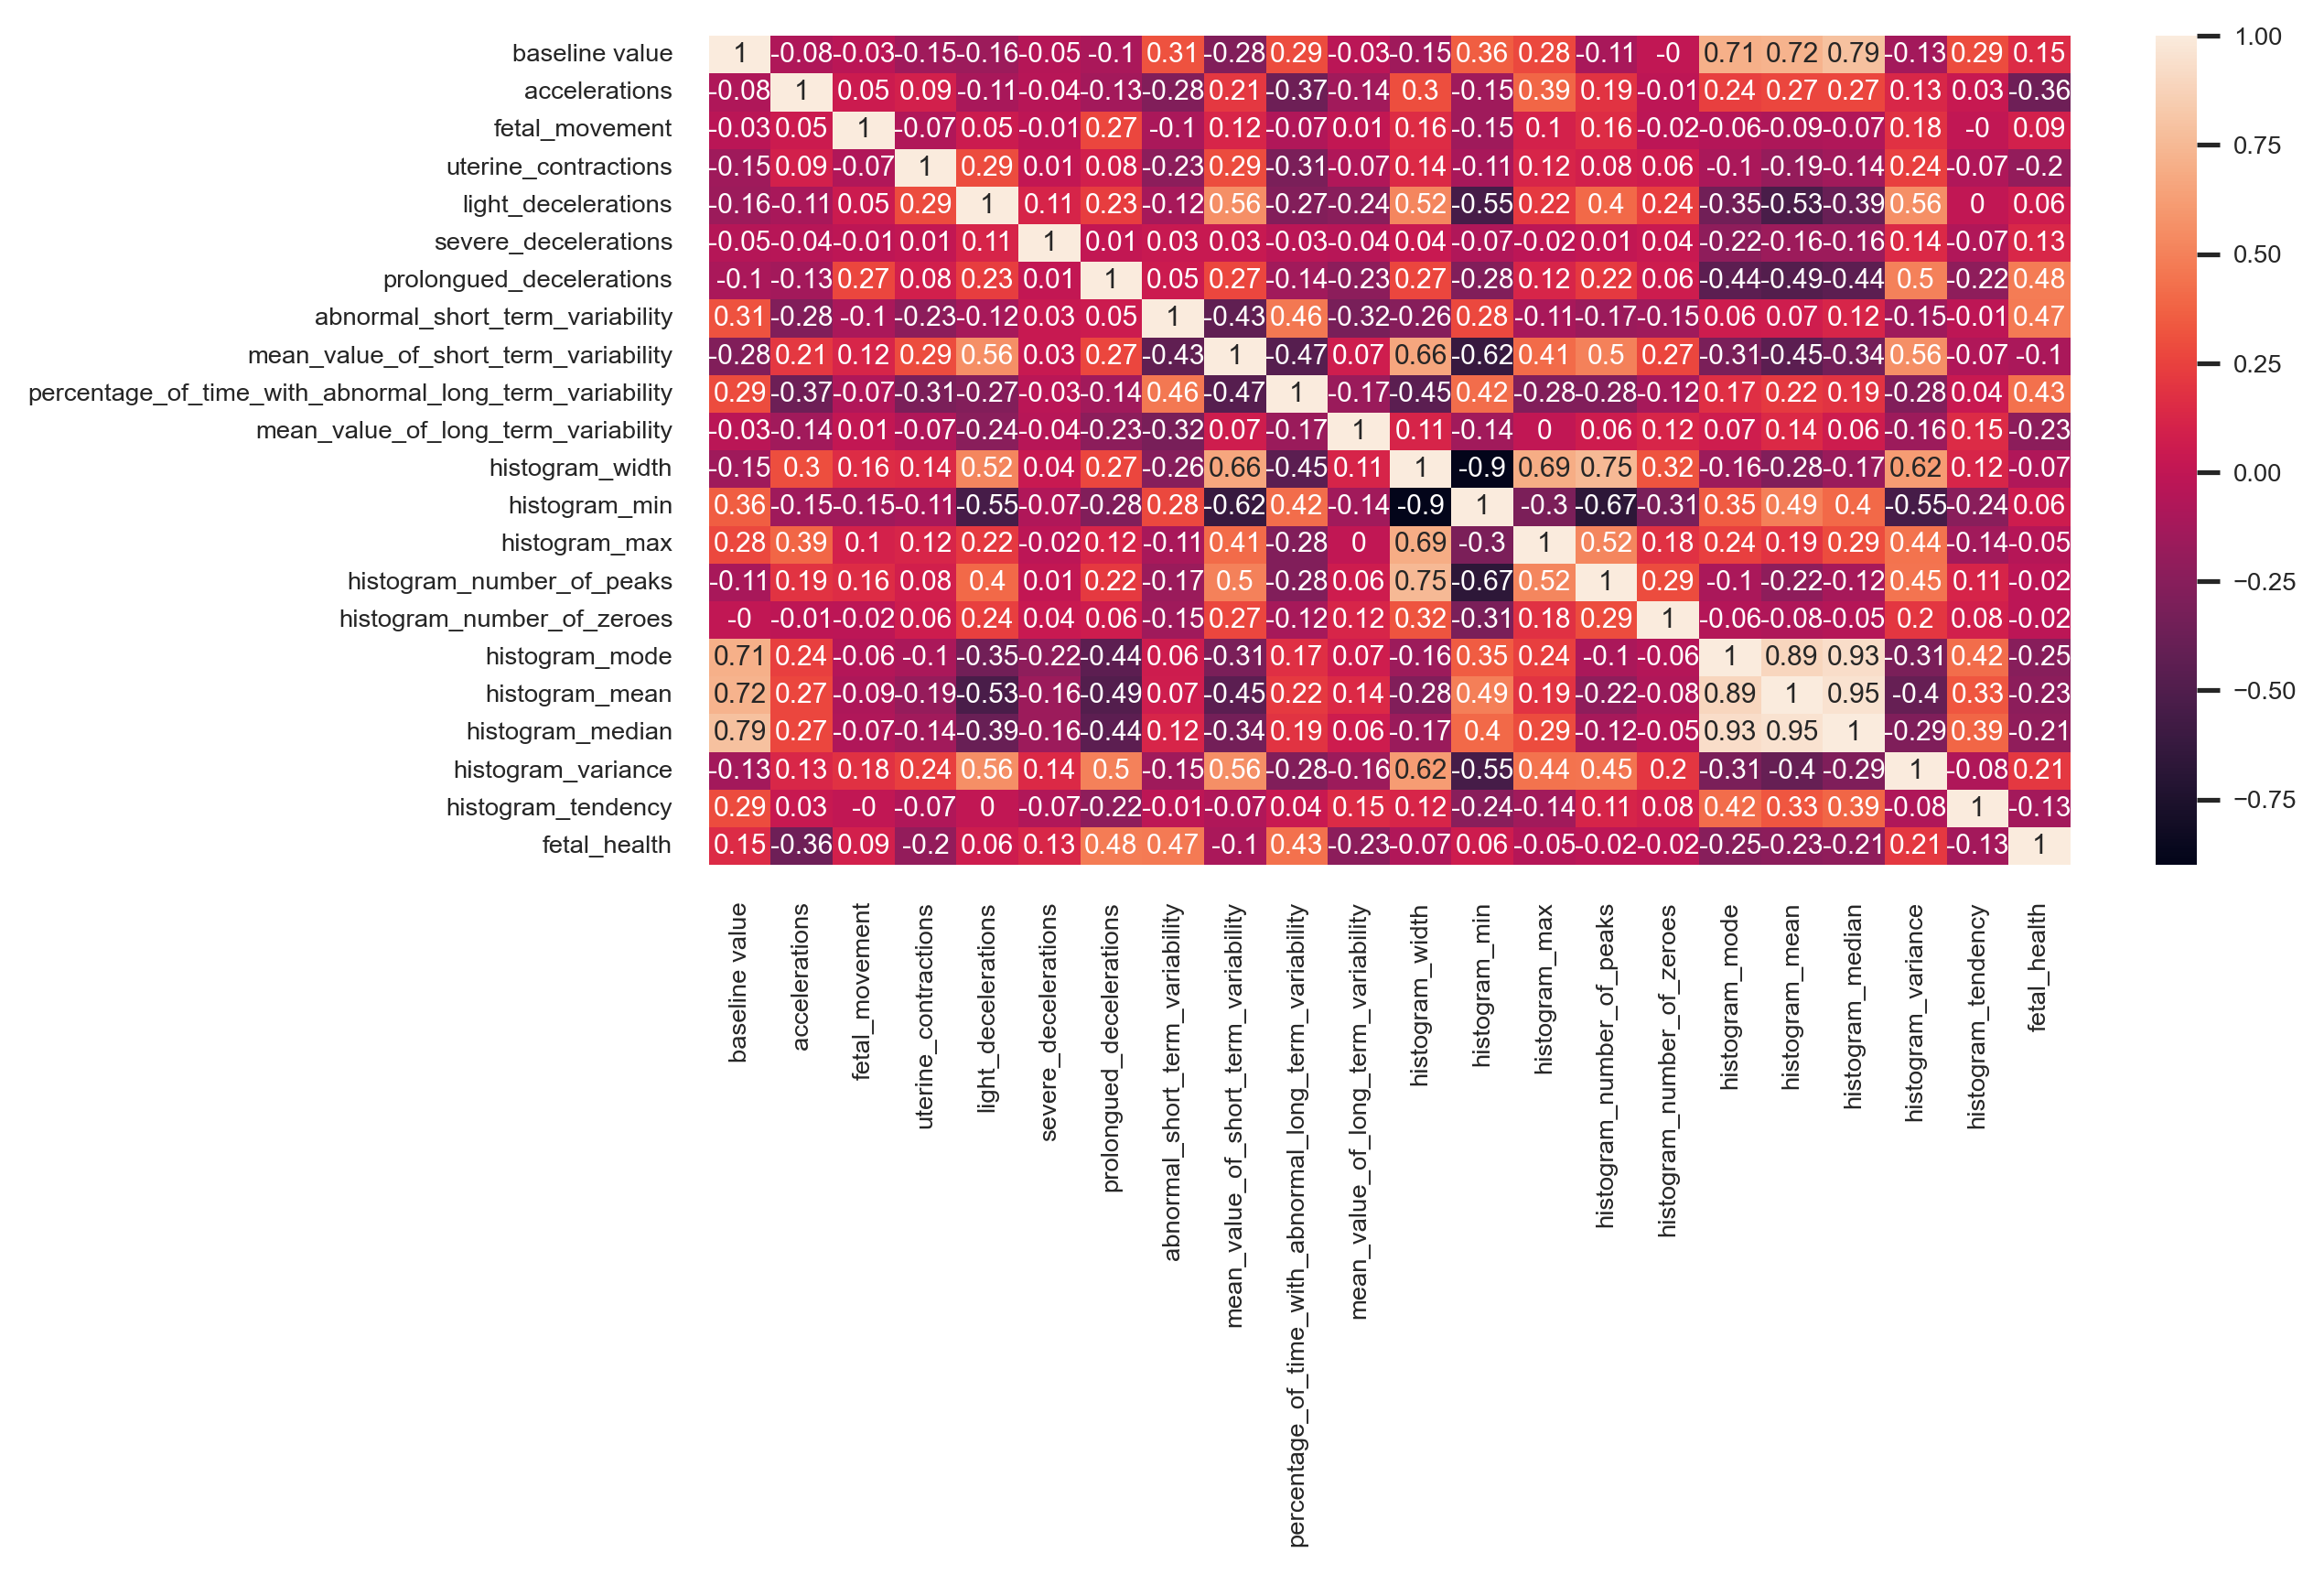

In [65]:
#Correlation HeatMap
sns.set(rc={'figure.figsize':(8,4), "figure.dpi":300})
sns.set_theme(font_scale=0.6)
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

### Preparing The Data for the model creation

In [68]:
# Standardise the Data
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(df.drop(["fetal_health"],axis = 1),), columns = columns)

In [69]:
# Standardised Variables
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.203210,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680604,-0.822388,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.282833,0.823885,...,-0.781736,1.469229,0.723223,-0.023130,-0.458444,0.949354,0.987141,0.961731,-0.580173,-0.524526
2122,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.660775,...,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.858853,0.892590,-0.545656,1.112980
2123,0.680604,-0.563635,-0.203210,0.894142,-0.638438,-0.057476,-0.268754,1.862255,-1.056341,0.552035,...,-0.088478,0.318764,0.333033,0.316003,-0.458444,0.949354,0.858853,0.961731,-0.511138,1.112980
2124,0.680604,-0.563635,-0.203210,0.554627,-0.638438,-0.057476,-0.268754,1.804078,-1.056341,0.932624,...,-0.114154,0.318764,0.277292,0.655137,-0.458444,0.888294,0.794709,0.892590,-0.511138,1.112980


In [70]:
# Split the Data for Train and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    df.iloc[:, -1], 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=df.iloc[:, -1])

In [71]:
# XGBoost requires categories to be recoded
Y_train = Y_train.astype(int).replace({1:0, 2:1, 3:2})
Y_test = Y_test.astype(int).replace({1:0, 2:1, 3:2})

In [72]:
# Create the XGBClassifier
xgb1 = xgb.XGBClassifier(objective="multi:softmax", seed=42, num_class=3, early_stopping_rounds=10, eval_metric="aucpr")

In [73]:
# Fit the classifier
xgb1.fit(X_train, Y_train, eval_set=[(X_test, Y_test)] )

[0]	validation_0-aucpr:0.88620
[1]	validation_0-aucpr:0.87758
[2]	validation_0-aucpr:0.88202
[3]	validation_0-aucpr:0.89802
[4]	validation_0-aucpr:0.90066
[5]	validation_0-aucpr:0.90849
[6]	validation_0-aucpr:0.91763
[7]	validation_0-aucpr:0.92293
[8]	validation_0-aucpr:0.92387
[9]	validation_0-aucpr:0.92582
[10]	validation_0-aucpr:0.92788
[11]	validation_0-aucpr:0.92952
[12]	validation_0-aucpr:0.92978
[13]	validation_0-aucpr:0.93189
[14]	validation_0-aucpr:0.93510
[15]	validation_0-aucpr:0.93523
[16]	validation_0-aucpr:0.93518
[17]	validation_0-aucpr:0.93531
[18]	validation_0-aucpr:0.93579
[19]	validation_0-aucpr:0.93325
[20]	validation_0-aucpr:0.93357
[21]	validation_0-aucpr:0.93395
[22]	validation_0-aucpr:0.93536
[23]	validation_0-aucpr:0.93374
[24]	validation_0-aucpr:0.93329
[25]	validation_0-aucpr:0.93335
[26]	validation_0-aucpr:0.93316
[27]	validation_0-aucpr:0.93237
[28]	validation_0-aucpr:0.93191


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric='aucpr', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=42, ...)

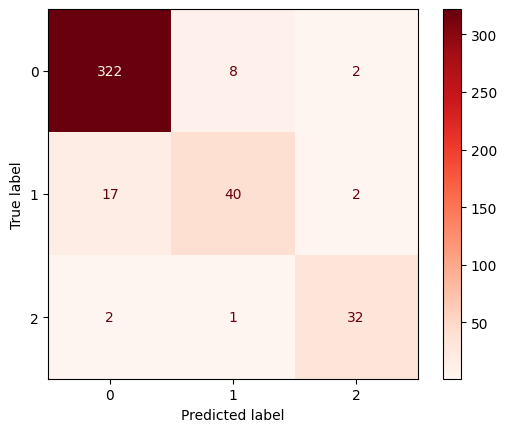

In [80]:
# Confusion Matrix of the first model
sns.reset_orig()
ConfusionMatrixDisplay.from_estimator(xgb1, X_test, Y_test, cmap="Reds")
plt.show()

In [83]:
predict_acc1 = (pd.Series(xgb1.predict(X_test)) == Y_test.reset_index(drop=True)).sum()/Y_test.count()
print("The Accuracy of the model =", predict_acc1)

The Accuracy of the model = 0.9248826291079812


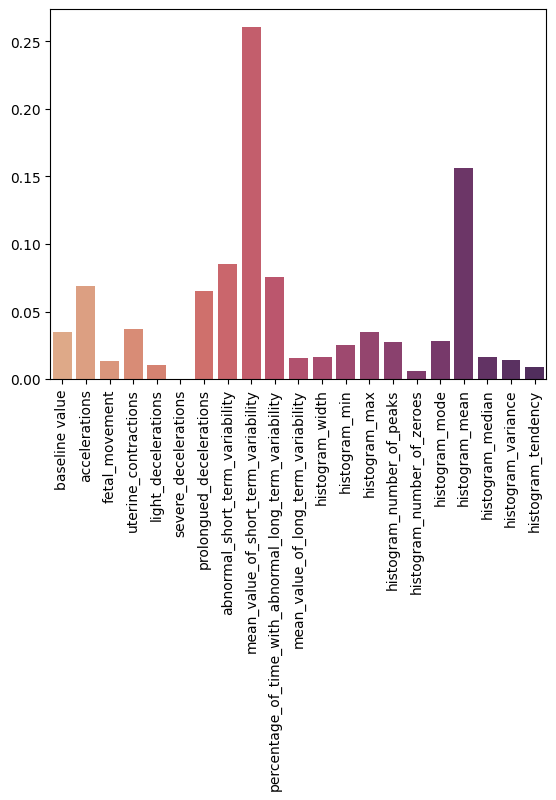

In [91]:
# The feature importance for the first model
fig1 = sns.barplot(x=X_train.columns, y=xgb1.feature_importances_, palette="flare", order=X_train.columns)
fig1.set_xticklabels(fig1.get_xticklabels(),rotation='vertical')
plt.show()

In [93]:
# Set the parametres for first GridSearchCV
param_test1 = {
    "eta": [0.05, 0.1, 0.2, 0.3, 0.4], 
    "max_depth": [4, 5, 6, 7], 
    "min_child_weight": [1, 3, 5], 
    "lambda": [0, 1, 10],
    "gamma": [0, 0.25, 1]
}

In [94]:
# Creat the first GridSearch
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1,
                        n_jobs=-1,verbose = 10, cv=5)

In [95]:
# Fir the gridsearch
gsearch1.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[0]	validation_0-aucpr:0.85855
[1]	validation_0-aucpr:0.86882
[2]	validation_0-aucpr:0.88479
[3]	validation_0-aucpr:0.89240
[4]	validation_0-aucpr:0.89246
[5]	validation_0-aucpr:0.89836
[6]	validation_0-aucpr:0.90588
[7]	validation_0-aucpr:0.90957
[8]	validation_0-aucpr:0.91229
[9]	validation_0-aucpr:0.91815
[10]	validation_0-aucpr:0.91933
[11]	validation_0-aucpr:0.92175
[12]	validation_0-aucpr:0.92488
[13]	validation_0-aucpr:0.92547
[14]	validation_0-aucpr:0.92759
[15]	validation_0-aucpr:0.92906
[16]	validation_0-aucpr:0.93110
[17]	validation_0-aucpr:0.93294
[18]	validation_0-aucpr:0.93089
[19]	validation_0-aucpr:0.93070
[20]	validation_0-aucpr:0.93317
[21]	validation_0-aucpr:0.93435
[22]	validation_0-aucpr:0.93336
[23]	validation_0-aucpr:0.93161
[24]	validation_0-aucpr:0.93277
[25]	validation_0-aucpr:0.93379
[26]	validation_0-aucpr:0.93352
[27]	validation_0-aucpr:0.93328
[28]	validation_0-aucpr:0.93001
[29]	validation_0-

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='aucpr', gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_c...
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimator

In [96]:
# Display the best parametres and the best score
gsearch1.best_score_, gsearch1.best_params_

(0.9523529411764706,
 {'eta': 0.05, 'gamma': 0, 'lambda': 0, 'max_depth': 4, 'min_child_weight': 1})

In [98]:
# Set the parametres for the 2nd GridSearch
param_test2 = {
    "eta": [0.01, 0.05, 0.1], 
    "max_depth": [5, 7, 9,], 
    "min_child_weight": [2, 3, 4], 
    "lambda": [0],
    "gamma": [0, 0.25]
}

In [99]:
gsearch2 = GridSearchCV(estimator = xgb1, param_grid = param_test2,
                        n_jobs=-1,verbose = 10, cv=5)
gsearch2.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[0]	validation_0-aucpr:0.89388
[1]	validation_0-aucpr:0.87827
[2]	validation_0-aucpr:0.89541
[3]	validation_0-aucpr:0.90423
[4]	validation_0-aucpr:0.90421
[5]	validation_0-aucpr:0.91573
[6]	validation_0-aucpr:0.91696
[7]	validation_0-aucpr:0.91935
[8]	validation_0-aucpr:0.91743
[9]	validation_0-aucpr:0.92371
[10]	validation_0-aucpr:0.92338
[11]	validation_0-aucpr:0.92381
[12]	validation_0-aucpr:0.92541
[13]	validation_0-aucpr:0.92463
[14]	validation_0-aucpr:0.92531
[15]	validation_0-aucpr:0.92887
[16]	validation_0-aucpr:0.92973
[17]	validation_0-aucpr:0.93032
[18]	validation_0-aucpr:0.93027
[19]	validation_0-aucpr:0.93070
[20]	validation_0-aucpr:0.93096
[21]	validation_0-aucpr:0.92852
[22]	validation_0-aucpr:0.92871
[23]	validation_0-aucpr:0.92882
[24]	validation_0-aucpr:0.92675
[25]	validation_0-aucpr:0.92910
[26]	validation_0-aucpr:0.92944
[27]	validation_0-aucpr:0.92825
[28]	validation_0-aucpr:0.92784
[29]	validation_0-au

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric='aucpr', gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_c...delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                   

In [100]:
# Display the best parametres and the best score
gsearch2.best_score_, gsearch2.best_params_

(0.9505882352941176,
 {'eta': 0.01, 'gamma': 0, 'lambda': 0, 'max_depth': 7, 'min_child_weight': 4})

In [101]:
xgb2 = xgb.XGBClassifier(objective="multi:softmax", seed=42, 
                         num_class=3, early_stopping_rounds=10, eval_metric="aucpr",
                        eta=0.1, reg_lambda=0, max_depth=4, min_child_weight=1)

In [102]:
xgb2.fit(X_train, Y_train, eval_set=[(X_test, Y_test)] )

[0]	validation_0-aucpr:0.80200
[1]	validation_0-aucpr:0.81528
[2]	validation_0-aucpr:0.81405
[3]	validation_0-aucpr:0.82107
[4]	validation_0-aucpr:0.81697
[5]	validation_0-aucpr:0.82225
[6]	validation_0-aucpr:0.82640
[7]	validation_0-aucpr:0.84263
[8]	validation_0-aucpr:0.87717
[9]	validation_0-aucpr:0.88665
[10]	validation_0-aucpr:0.88769
[11]	validation_0-aucpr:0.88905
[12]	validation_0-aucpr:0.89152
[13]	validation_0-aucpr:0.88527
[14]	validation_0-aucpr:0.88657
[15]	validation_0-aucpr:0.88543
[16]	validation_0-aucpr:0.87777
[17]	validation_0-aucpr:0.87770
[18]	validation_0-aucpr:0.88864
[19]	validation_0-aucpr:0.89666
[20]	validation_0-aucpr:0.89839
[21]	validation_0-aucpr:0.89817
[22]	validation_0-aucpr:0.89861
[23]	validation_0-aucpr:0.89915
[24]	validation_0-aucpr:0.90139
[25]	validation_0-aucpr:0.90235
[26]	validation_0-aucpr:0.90063
[27]	validation_0-aucpr:0.90286
[28]	validation_0-aucpr:0.90522
[29]	validation_0-aucpr:0.90705
[30]	validation_0-aucpr:0.90845
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False, eta=0.1,
              eval_metric='aucpr', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=3, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [103]:
predict_acc2 = (pd.Series(xgb2.predict(X_test)) == Y_test.reset_index(drop=True)).sum()/Y_test.count()
print("The Accuracy of the model =", predict_acc2)

The Accuracy of the model = 0.9389671361502347


In [105]:
# Display the classification accuracy report
print(classification_report(pd.Series(xgb2.predict(X_test)), Y_test.reset_index(drop=True)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       342
           1       0.71      0.88      0.79        48
           2       0.91      0.89      0.90        36

    accuracy                           0.94       426
   macro avg       0.87      0.91      0.88       426
weighted avg       0.95      0.94      0.94       426



The model predicts the fetal health with 94% accuracy

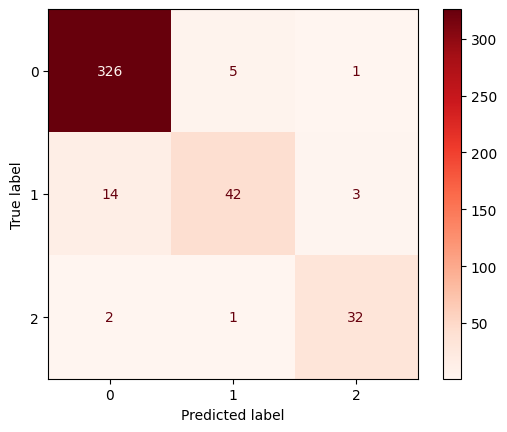

In [107]:
# Creat the confusion matrix
sns.reset_orig()
ConfusionMatrixDisplay.from_estimator(xgb2, X_test, Y_test, cmap="Reds")
plt.show()

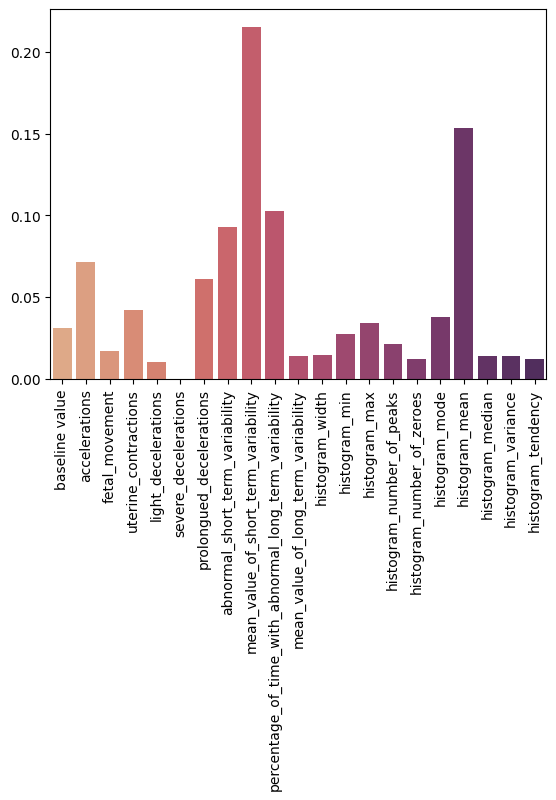

In [115]:
# Create the feature importance plot for improved model
fig2 = sns.barplot(x=X_train.columns, y=xgb2.feature_importances_, palette = "flare")
fig2.set_xticklabels(fig2.get_xticklabels(),rotation='vertical')
plt.show()

In [117]:
xgb2.save_model("XGB Fetal Health")

I've succesfully created XGBoost model scoring 94% accuracy.